# Raj Somal

## Research question/interests

When are symptoms of anxiety disorder highest and lowest in California?

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style= "whitegrid", font_scale= 1.2)

In [18]:
import pandas as pd
pd.read_csv("../data/raw/Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days.csv")

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8365,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,3.2,38,"Sep 15 - Sep 27, 2021",09/15/2021,09/27/2021,31.8,27.3,36.6,27.3 - 36.6,31.4-35.6
8366,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,3.2,38,"Sep 15 - Sep 27, 2021",09/15/2021,09/27/2021,36.2,32.5,40.0,32.5 - 40.0,35.7-41.7
8367,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,3.2,38,"Sep 15 - Sep 27, 2021",09/15/2021,09/27/2021,30.7,25.4,36.4,25.4 - 36.4,28.3-31.3
8368,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,3.2,38,"Sep 15 - Sep 27, 2021",09/15/2021,09/27/2021,28.3,24.9,31.9,24.9 - 31.9,28.3-31.3


## Milestone 3 Task 1

### Loading Data

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# cvs data

df = pd.read_csv("../data/raw/Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days.csv")
raw = df.drop(columns=['Phase','Time Period','Subgroup','Group','Time Period Start Date','Time Period Start Date','Time Period End Date','Low CI','High CI','Quartile Range'])

In [21]:
raw.dropna()

,Indicator,State,Time Period Label,Value,Confidence Interval
0,Symptoms of Depressive Disorder,United States,"Apr 23 - May 5, 2020",23.5,22.7 - 24.3
1,Symptoms of Depressive Disorder,United States,"Apr 23 - May 5, 2020",32.7,30.2 - 35.2
2,Symptoms of Depressive Disorder,United States,"Apr 23 - May 5, 2020",25.7,24.1 - 27.3
3,Symptoms of Depressive Disorder,United States,"Apr 23 - May 5, 2020",24.8,23.3 - 26.2
4,Symptoms of Depressive Disorder,United States,"Apr 23 - May 5, 2020",23.2,21.5 - 25.0
...,...,...,...,...,...
8365,Symptoms of Anxiety Disorder or Depressive Dis...,Virginia,"Sep 15 - Sep 27, 2021",31.8,27.3 - 36.6
8366,Symptoms of Anxiety Disorder or Depressive Dis...,Washington,"Sep 15 - Sep 27, 2021",36.2,32.5 - 40.0
8367,Symptoms of Anxiety Disorder or Depressive Dis...,West Virginia,"Sep 15 - Sep 27, 2021",30.7,25.4 - 36.4
8368,Symptoms of Anxiety Disorder or Depressive Dis...,Wisconsin,"Sep 15 - Sep 27, 2021",28.3,24.9 - 31.9


### Cleaning Data

Cleaning the dataframe so it only contains the following:
- Indicator: Symptoms of Anxiety Disorder
- State: California
- Percentage (Value)
- Confidence Interval

In [39]:
raw.drop(raw[raw["Indicator"] != "Symptoms of Anxiety Disorder"].index, inplace=True)
raw.drop(raw[raw["State"] != "California"].index, inplace=True)

raw = raw.rename(columns={"Value":"Level"})
raw = raw.rename(columns={"Time Period Label":"Time Period"})

In [40]:
df_clean = raw.reset_index(drop=True)

In [41]:
df_clean.to_csv('rajsomal_cleanedData.csv',index=False)

## EDA

In [42]:
df_cleaned = pd.read_csv("../data/processed/rajsomal_cleanedData.csv")

In [43]:
df_cleaned.describe()

,Value
count,38.000000
mean,32.905263
std,4.434322
min,24.700000
25%,29.275000
50%,33.350000
75%,36.125000
max,39.900000


In [44]:
df_cleaned.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Value,38.0,32.905263,4.434322,24.7,29.275,33.35,36.125,39.9


In [45]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
Indicator,38,1,Symptoms of Anxiety Disorder,38
State,38,1,California,38
Time Period Label,38,38,"Apr 23 - May 5, 2020",1
Confidence Interval,38,38,28.2 - 33.5,1


## Visualizations

In [48]:
pd.DataFrame(df.groupby("Time Period Label").mean()["Value"])

,Value
Time Period Label,
"Apr 14 - Apr 26, 2021",30.5
"Apr 23 - May 5, 2020",30.8
"Apr 28 - May 10, 2021",28.5
"Aug 18 - Aug 30, 2021",26.2
"Aug 19 - Aug 31, 2020",32.4
"Aug 4 - Aug 16, 2021",27.8
"Dec 9 - Dec 21, 2020",38.9
"Feb 17 - Mar 1, 2021",35.9
"Feb 3 - Feb 15, 2021",35.7


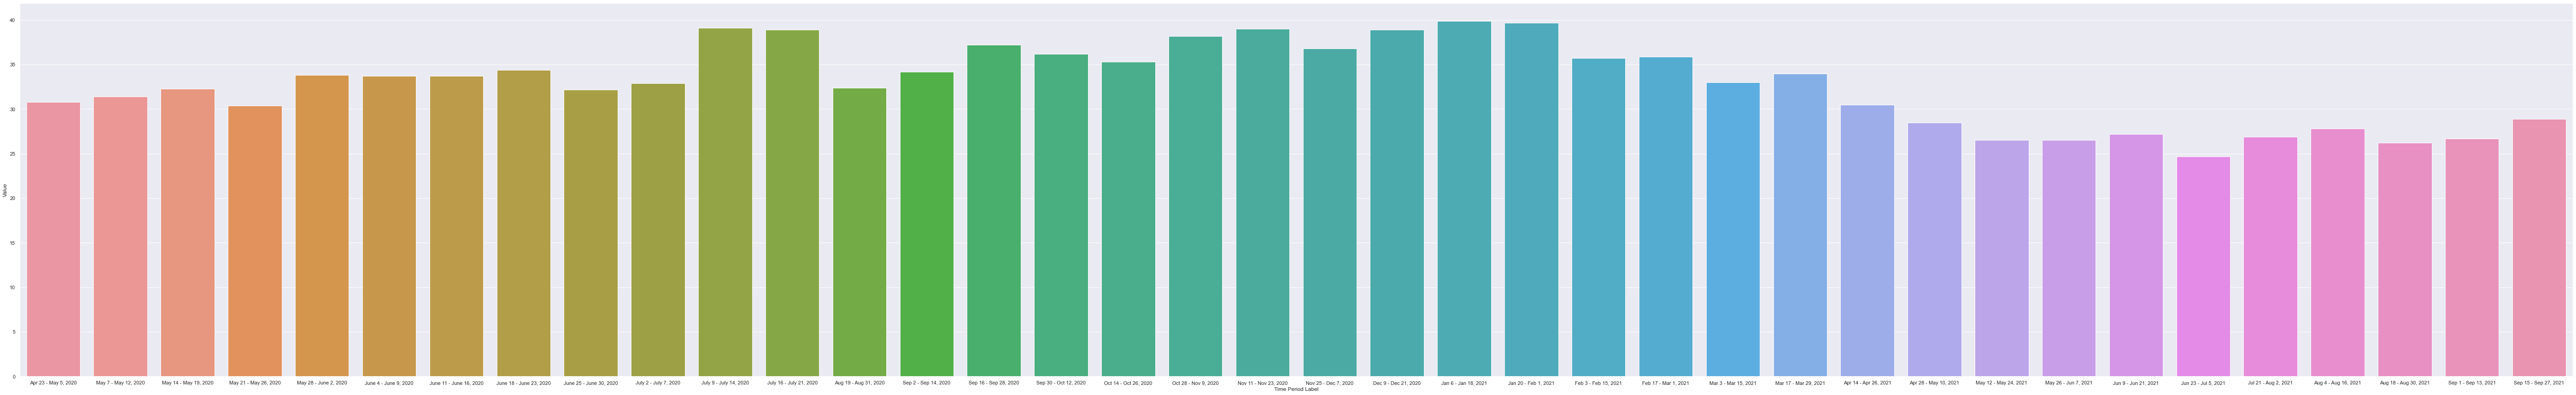

In [33]:
sns.barplot(x="Time Period Label",y="Value",data=df_cleaned)
sns.set(rc = {'figure.figsize':(50,15)})

## Task 3

### Method Chaining

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

df = (
    pd
    .read_csv("../data/raw/Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days.csv")
    .drop(columns=['Phase','Time Period','Subgroup','Group','Time Period Start Date','Time Period Start Date','Time Period End Date','Low CI','High CI','Quartile Range'])
    .dropna()
    .rename(columns={"Percentage":"Level"})
)

df.drop(df[df["Indicator"] != "Symptoms of Anxiety Disorder"].index, inplace=True)
df.drop(df[df["State"] != "California"].index, inplace=True)
df.reset_index(drop=True)

,Indicator,State,Time Period Label,Value,Confidence Interval
0,Symptoms of Anxiety Disorder,California,"Apr 23 - May 5, 2020",30.8,28.2 - 33.5
1,Symptoms of Anxiety Disorder,California,"May 7 - May 12, 2020",31.4,27.4 - 35.6
2,Symptoms of Anxiety Disorder,California,"May 14 - May 19, 2020",32.3,29.0 - 35.7
3,Symptoms of Anxiety Disorder,California,"May 21 - May 26, 2020",30.4,27.4 - 33.6
4,Symptoms of Anxiety Disorder,California,"May 28 - June 2, 2020",33.8,31.5 - 36.2
5,Symptoms of Anxiety Disorder,California,"June 4 - June 9, 2020",33.7,31.1 - 36.4
6,Symptoms of Anxiety Disorder,California,"June 11 - June 16, 2020",33.7,29.9 - 37.6
7,Symptoms of Anxiety Disorder,California,"June 18 - June 23, 2020",34.4,31.7 - 37.2
8,Symptoms of Anxiety Disorder,California,"June 25 - June 30, 2020",32.2,30.1 - 34.4
9,Symptoms of Anxiety Disorder,California,"July 2 - July 7, 2020",32.9,30.2 - 35.7


### Wrapping Method Chain in Function

In [29]:
def load_and_process(url):
    df = (
        pd
        .read_csv(url)
        .drop(columns=['Phase','Time Period','Subgroup','Group','Time Period Start Date','Time Period Start Date','Time Period End Date','Low CI','High CI','Quartile Range'])
        .dropna()
        .rename(columns={"Percentage":"Level"})
    )

    df.drop(df[df["Indicator"] != "Symptoms of Anxiety Disorder"].index, inplace=True)
    df.drop(df[df["State"] != "California"].index, inplace=True)
    
    return df.reset_index(drop=True)


load_and_process("../data/raw/Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days.csv")

,Indicator,State,Time Period Label,Value,Confidence Interval
0,Symptoms of Anxiety Disorder,California,"Apr 23 - May 5, 2020",30.8,28.2 - 33.5
1,Symptoms of Anxiety Disorder,California,"May 7 - May 12, 2020",31.4,27.4 - 35.6
2,Symptoms of Anxiety Disorder,California,"May 14 - May 19, 2020",32.3,29.0 - 35.7
3,Symptoms of Anxiety Disorder,California,"May 21 - May 26, 2020",30.4,27.4 - 33.6
4,Symptoms of Anxiety Disorder,California,"May 28 - June 2, 2020",33.8,31.5 - 36.2
5,Symptoms of Anxiety Disorder,California,"June 4 - June 9, 2020",33.7,31.1 - 36.4
6,Symptoms of Anxiety Disorder,California,"June 11 - June 16, 2020",33.7,29.9 - 37.6
7,Symptoms of Anxiety Disorder,California,"June 18 - June 23, 2020",34.4,31.7 - 37.2
8,Symptoms of Anxiety Disorder,California,"June 25 - June 30, 2020",32.2,30.1 - 34.4
9,Symptoms of Anxiety Disorder,California,"July 2 - July 7, 2020",32.9,30.2 - 35.7


### Function Moved into a new .py file

In [30]:
import project_function1
df = project_function1.load_and_process("../data/raw/Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days.csv")
df

,Indicator,State,Time Period Label,Value,Confidence Interval
0,Symptoms of Anxiety Disorder,California,"Apr 23 - May 5, 2020",30.8,28.2 - 33.5
1,Symptoms of Anxiety Disorder,California,"May 7 - May 12, 2020",31.4,27.4 - 35.6
2,Symptoms of Anxiety Disorder,California,"May 14 - May 19, 2020",32.3,29.0 - 35.7
3,Symptoms of Anxiety Disorder,California,"May 21 - May 26, 2020",30.4,27.4 - 33.6
4,Symptoms of Anxiety Disorder,California,"May 28 - June 2, 2020",33.8,31.5 - 36.2
5,Symptoms of Anxiety Disorder,California,"June 4 - June 9, 2020",33.7,31.1 - 36.4
6,Symptoms of Anxiety Disorder,California,"June 11 - June 16, 2020",33.7,29.9 - 37.6
7,Symptoms of Anxiety Disorder,California,"June 18 - June 23, 2020",34.4,31.7 - 37.2
8,Symptoms of Anxiety Disorder,California,"June 25 - June 30, 2020",32.2,30.1 - 34.4
9,Symptoms of Anxiety Disorder,California,"July 2 - July 7, 2020",32.9,30.2 - 35.7


In [31]:
import project_functions2
project_functions2.load_and_process("../data/raw/Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days.csv")

,Indicator,Group,State,Time Period Label,Percentage,Confidence Interval
0,Symptoms of Depressive Disorder,By State,Alabama,"Sep 15 - Sep 27, 2021",23.0,18.0 - 28.8
1,Symptoms of Depressive Disorder,By State,Alaska,"Sep 15 - Sep 27, 2021",28.3,23.8 - 33.2
2,Symptoms of Depressive Disorder,By State,Arizona,"Sep 15 - Sep 27, 2021",23.2,19.2 - 27.5
3,Symptoms of Depressive Disorder,By State,Arkansas,"Sep 15 - Sep 27, 2021",29.7,24.0 - 36.0
4,Symptoms of Depressive Disorder,By State,California,"Sep 15 - Sep 27, 2021",24.6,21.6 - 27.7
5,Symptoms of Depressive Disorder,By State,Colorado,"Sep 15 - Sep 27, 2021",21.1,17.9 - 24.7
6,Symptoms of Depressive Disorder,By State,Connecticut,"Sep 15 - Sep 27, 2021",18.1,14.7 - 22.0
7,Symptoms of Depressive Disorder,By State,Delaware,"Sep 15 - Sep 27, 2021",25.5,19.1 - 32.7
8,Symptoms of Depressive Disorder,By State,District of Columbia,"Sep 15 - Sep 27, 2021",16.5,12.0 - 21.9
9,Symptoms of Depressive Disorder,By State,Florida,"Sep 15 - Sep 27, 2021",22.9,19.8 - 26.3


## Task 4

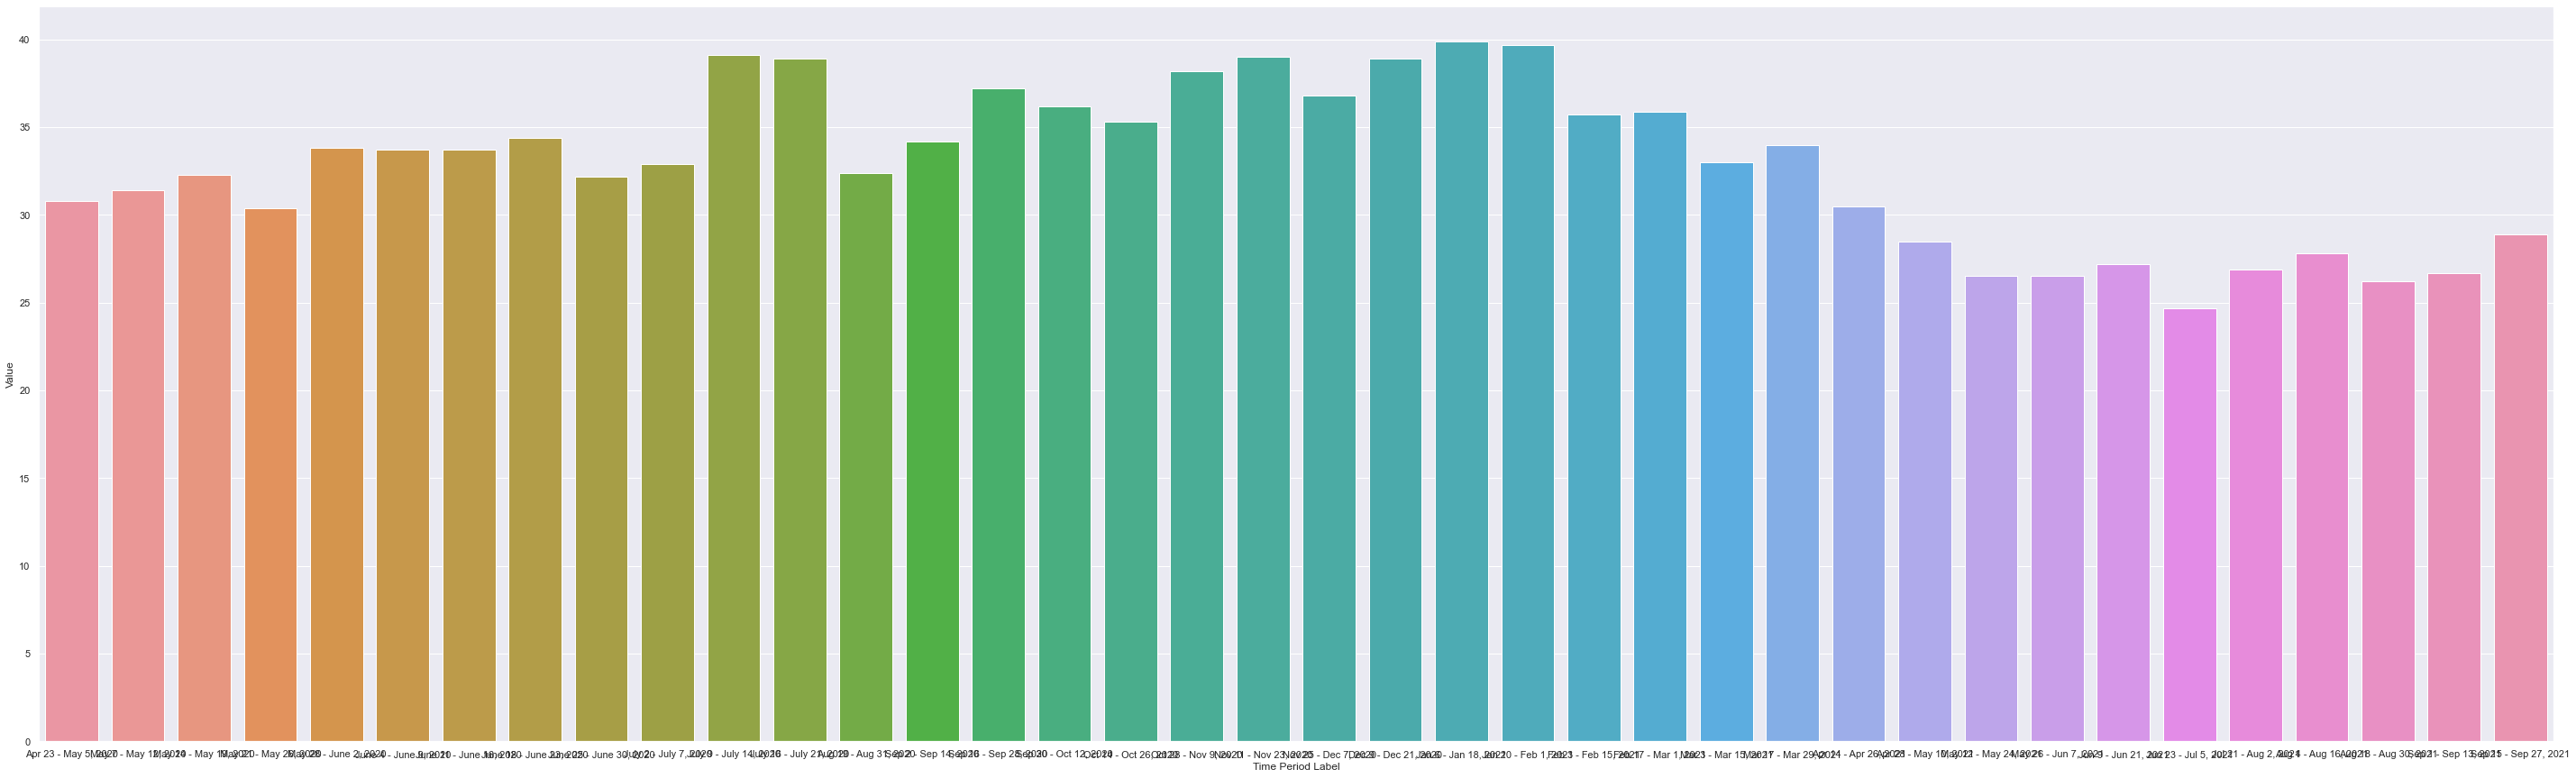

In [52]:
sns.barplot(x="Time Period Label",y="Value",data=df_cleaned)
sns.set(rc = {'figure.figsize':(50,15)})

## Analysis

### When are symptoms of anxiety disorder highest in California from April 2020 to September 2021?

##### Symptoms of Anxiety Disorder appear to be at there highest during January 6 to 18 with a 39.9% of people facing symptoms of anxiety during this time period. From April 23, 2020 to December 22, symptoms of anxiety appear to remain relatively stable but at a high level (>30%). The anxiety levels peak in the beginning of January to mid-January. The level anxiety symptoms do not flucuate much until March 2021. After March 2021 we see a steady decline of symptoms of anxiety. In June 2021 to July 2021 we saw the lowest levels of anxiety symptoms reported from April 2020 to September 2021 at 24.7%. 

##### Comparing these results to California's reported COVID-19 cases, we see that symptoms of anxiety trends are similar to the amount of COVID cases reported. In January, California faced the highest amount of COVID-19 cases reported this also was the case for the symptoms of anxiety trend. And again in June to July, California saw the fewest amount of COVID cases reported similar to the symptoms anxiety levels reported.

##### Based off this fact we can conclude that symptoms of anxiety are higher when more COVID-19 cases are reported. 